<a href="https://colab.research.google.com/github/ferdouszislam/pytorch-practice/blob/main/pytorch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import torch
import numpy as np
import math

In [206]:
if torch.cuda.is_available():
  print('GPU, yay!')
else:
  print('CPU :(')

CPU :(


# Tutorial 02 - Tensor Basics

In [207]:
x = torch.rand(3,3)
y = torch.rand(3,3)

In [208]:
print(x, '\n', y, '\n')

tensor([[0.1837, 0.2798, 0.2174],
        [0.0621, 0.8123, 0.9890],
        [0.9186, 0.8131, 0.7220]]) 
 tensor([[0.3029, 0.0965, 0.2047],
        [0.7264, 0.6094, 0.5638],
        [0.1965, 0.2648, 0.2891]]) 



In [209]:
z = torch.add(x, y)
z

tensor([[0.4865, 0.3763, 0.4221],
        [0.7885, 1.4217, 1.5529],
        [1.1151, 1.0779, 1.0111]])

In [210]:
z = torch.mul(x, y)
z 

tensor([[0.0556, 0.0270, 0.0445],
        [0.0451, 0.4950, 0.5576],
        [0.1805, 0.2153, 0.2088]])

In [211]:
z.add_(y) # same as z+=y

tensor([[0.3585, 0.1235, 0.2492],
        [0.7715, 1.1044, 1.1215],
        [0.3771, 0.4800, 0.4979]])

In [212]:
z[:, 2] # get all rows at column 2 (0 based indexing)

tensor([0.2492, 1.1215, 0.4979])

In [213]:
z[1,2].item() # get single element value

1.121473789215088

In [214]:
'''
input- a pytorch tensor variable 
returns- multiplication of the input tensor's dimensions 
'''
def get_flat_shape(tensor):
  dims=list(tensor.size())
  flat_dim = 1
  for dim in dims:
    flat_dim*=dim
  return flat_dim

In [215]:
get_flat_shape(z)

9

In [216]:
flat_z = z.view(get_flat_shape(z)) # resizing a tensor
flat_z

tensor([0.3585, 0.1235, 0.2492, 0.7715, 1.1044, 1.1215, 0.3771, 0.4800, 0.4979])

In [217]:
# tensor to numpy array conversion
np_z = flat_z.clone().numpy() # using '.clone()' is a MUST
np_z

array([0.35850933, 0.12352349, 0.24919325, 0.771486  , 1.1043884 ,
       1.1214738 , 0.37709093, 0.4800402 , 0.49788365], dtype=float32)

In [218]:
# numpy array to tensor conversion
flat_z = torch.from_numpy(np_z.copy()) # using '.copy()' is a MUST
flat_z

tensor([0.3585, 0.1235, 0.2492, 0.7715, 1.1044, 1.1215, 0.3771, 0.4800, 0.4979])

  
  **Tensors can be kept into GPU but numpy arrays have to remain on CPU. GPUs are generally faster.**  


In [219]:
device = False
if torch.cuda.is_available():
  device = torch.device("cuda")

In [220]:
# all operations on tensors to be done in GPU
# x = torch.rand(2, 2).to(device)
# y = torch.rand(2, 2).to(device)
# z=x+y

# print(x, '\n', y, '\n', z)

In [221]:
# numpy arrays MUST be on cpu
z = z.to('cpu')
np_z = z.clone().numpy()
np_z

array([[0.35850933, 0.12352349, 0.24919325],
       [0.771486  , 1.1043884 , 1.1214738 ],
       [0.37709093, 0.4800402 , 0.49788365]], dtype=float32)

# Tutorial 03 - Gradient Calculation with Autograd

In [222]:
x = torch.randn(3, requires_grad=True)
x

tensor([-1.0475,  0.0511, -2.6235], requires_grad=True)

In [223]:
y=x+2
print(y)
z=y*y*2
print(z)
z = z.mean()
print(z) 

tensor([ 0.9525,  2.0511, -0.6235], grad_fn=<AddBackward0>)
tensor([1.8146, 8.4136, 0.7774], grad_fn=<MulBackward0>)
tensor(3.6685, grad_fn=<MeanBackward0>)


In [224]:
# calculating dz/dx for each element of x tensor (in this case- x1,x2,x3)
#  N.B- All but the last call to backward should have the retain_graph=True option
z.backward(retain_graph=True)
print(x.grad)

tensor([ 1.2700,  2.7347, -0.8313])


In [225]:
# prevent gradient tracking 
# (might be needed when updating weights during training)

x = torch.randn(3, requires_grad=True)
print(x)

# way 1
print('way 1')
y=x
y.requires_grad_(False)
print(x)

# way 2
print('way 2')
y=x.detach()
print(y)

# way 3
print('way 3')
y=x+2
print(x, '\n', y)
with torch.no_grad():
  y=x+2
  print(x, '\n', y)

tensor([-0.7938, -0.1984, -1.5807], requires_grad=True)
way 1
tensor([-0.7938, -0.1984, -1.5807])
way 2
tensor([-0.7938, -0.1984, -1.5807])
way 3
tensor([-0.7938, -0.1984, -1.5807]) 
 tensor([1.2062, 1.8016, 0.4193])
tensor([-0.7938, -0.1984, -1.5807]) 
 tensor([1.2062, 1.8016, 0.4193])


In [226]:
# dummy training example with some weights

weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum() # loss function... probably
  
  model_output.backward()
  print(weights.grad)

  # before next iteration or optimization step MUST empty the gradient
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Tutorial 04 - Back Propagation

In [227]:
# example backpropagation for a single instance

x = torch.tensor(1.0) # input
y = torch.tensor(2.0) # actual output

w = torch.tensor(1.0, requires_grad=True) # weight i.e, learnable parameter

# forward pass
y_hat = w*x # y_hat is the prediction using linear model = w*x 
loss = (y_hat - y)**2 # loss function = squared error (generally this would be MSE)

print(loss)

# backward pass
loss.backward()
print(w.grad)

# now update weight using the gradient 
# and do forward and backward pass again

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Tutorial 05 - Gradient Descent with Autograd & Backpropagation



In [228]:
# implementing linear regression from scratch with dummy data

# f = w*x, for the example model below- w = 2 fits the ouput completely 
X = np.array([1,2,3,4], dtype=np.float32) # input
Y = np.array([2,4,6,8], dtype=np.float32) # actual output

# randomely initializing weight
w = 0.0

# model prediction
def forward(x):
  return w*x

# loss function, MSE
def loss(y, y_pred):
  return ((y_pred-y)**2).mean()

# gradient
# here, loss, J = 1/N * (w*x-y)^2 [because y_pred = w*x]
# therefore, dJ/dw = 1/N*2*x*(w*x-y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred-y).mean()

print(f'Prediction before training for x=5 : {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 5

print('\n[Training started...]\n')
for epoch in range(n_iters):
  # prediction, forward pass
  y_pred = forward(X)

  # loss
  J = loss(Y, y_pred)

  # gradient
  dJ_dw = gradient(X, Y, y_pred)

  # update weights
  w = w - learning_rate* dJ_dw 

  # print everytime
  if epoch%1==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {J:.8f}')
print('\n[Training finished...]\n')

print(f'Prediction after training for x=5 : {forward(5):.3f}')

Prediction before training for x=5 : 0.000

[Training started...]

epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083

[Training finished...]

Prediction after training for x=5 : 9.898


### Now let's do the same using Autograd for backward pass

In [229]:
# implementing linear regression from scratch with dummy data

# f = w*x, for the example model below- w = 2 fits the ouput completely 
X = torch.tensor([1,2,3,4], dtype=torch.float32) # input
Y = torch.tensor([2,4,6,8], dtype=torch.float32) # actual output

# randomely initializing weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w*x

# loss function, MSE
def loss(y, y_pred):
  return ((y_pred-y)**2).mean()

# gradient
# here, loss, J = 1/N * (w*x-y)^2 [because y_pred = w*x]
# therefore, dJ/dw = 1/N*2*x*(w*x-y)
# def gradient(x, y, y_pred):
#   return np.dot(2*x, y_pred-y).mean()

print(f'Prediction before training for x=5 : {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

print('\n[Training started...]\n')
for epoch in range(n_iters):
  # prediction i.e forward pass
  y_pred = forward(X)

  # loss
  J = loss(Y, y_pred)

  # calculate gradient i.e backward pass
  #dJ_dw = gradient(X, Y, y_pred)
  J.backward() # dJ/dw

  # update weights
  #w = w - learning_rate* dJ_dw 
  w.data = w.data - learning_rate * w.grad
  # alternately we can do this,
  # with torch.no_grad(): 
  #   # update to weight should not be tracked for calculating gradient
  #   w -= learning_rate*w.grad

  w.grad.zero_() # clear the gradients 

  if epoch%2==1:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {J:.8f}')
print('\n[Training finished...]\n')

print(f'Prediction after training for x=5 : {forward(5):.3f}')

Prediction before training for x=5 : 0.000

[Training started...]

epoch 2: w = 0.555, loss = 21.67499924
epoch 4: w = 0.956, loss = 11.31448650
epoch 6: w = 1.246, loss = 5.90623236
epoch 8: w = 1.455, loss = 3.08308983
epoch 10: w = 1.606, loss = 1.60939169
epoch 12: w = 1.716, loss = 0.84011245
epoch 14: w = 1.794, loss = 0.43854395
epoch 16: w = 1.851, loss = 0.22892261
epoch 18: w = 1.893, loss = 0.11949898
epoch 20: w = 1.922, loss = 0.06237914

[Training finished...]

Prediction after training for x=5 : 9.612


# Tutorial 06 - Training Pipeline: Model, Loss, and Optimizer

### Implementing Linear Regression same as before but this time with model, loss, optimizer, autograd from the **torch.nn** library

In [230]:
import torch.nn as nn

In [231]:
'''
Typical Training Pipeline

1. design model (input size, output size, forward pass)
2. Construct loss & optimizer
3. Training loop
  - forward pass: compute prediction
  - backward pass: compute gradients
  - update weights
'''
# implementing linear regression from scratch with dummy data

# f = w*x, for the example model below- w = 2 fits the ouput completely 
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32) # input
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32) # actual output

n_samples, n_features = X.shape # 4 samples each with one feature
print('# of samples =', n_samples, ' # of features =', n_features, '\n')

# define custom model (same as Linear Regression for now)
class MyLinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(MyLinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

# model = nn.Linear(in_features=n_features, out_features=1)
model = MyLinearRegression(input_dim=n_features, output_dim=1)

# test data
X_test = torch.tensor([5], dtype=torch.float32)

print(f'Prediction before training for x=5 : {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 20 
# MSE as loss function
loss = nn.MSELoss()
# optimize model with stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print('\n[Training started...]\n')
for epoch in range(n_iters):
  # prediction i.e forward pass
  y_pred = model(X)

  # loss
  J = loss(y_pred, Y)

  # calculate gradient i.e backward pass
  J.backward() # dJ/dw

  # update weights using optimizer
  optimizer.step()
  optimizer.zero_grad() # clear the gradients 

  if epoch%2==1:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {J:.3f}')
print('\n[Training finished...]\n')

print(f'Prediction after training for x=5 : {model(X_test).item():.3f}')

# of samples = 4  # of features = 1 

Prediction before training for x=5 : -1.119

[Training started...]

epoch 2: w = 0.431, loss = 26.324
epoch 4: w = 0.860, loss = 12.695
epoch 6: w = 1.159, loss = 6.133
epoch 8: w = 1.366, loss = 2.974
epoch 10: w = 1.510, loss = 1.452
epoch 12: w = 1.610, loss = 0.719
epoch 14: w = 1.680, loss = 0.366
epoch 16: w = 1.729, loss = 0.196
epoch 18: w = 1.763, loss = 0.114
epoch 20: w = 1.787, loss = 0.074

[Training finished...]

Prediction after training for x=5 : 9.390


# Tutorial 07 Linear Regression

In [232]:
from sklearn import datasets
import matplotlib.pyplot as plt

epoch-10, loss = 1286.7487
weight - Parameter containing:
tensor([[13.7147]], requires_grad=True)
bias - Parameter containing:
tensor([-1.1800], requires_grad=True)

epoch-20, loss = 815.0140
weight - Parameter containing:
tensor([[23.1403]], requires_grad=True)
bias - Parameter containing:
tensor([-0.9988], requires_grad=True)

epoch-30, loss = 572.9822
weight - Parameter containing:
tensor([[29.8834]], requires_grad=True)
bias - Parameter containing:
tensor([-0.5980], requires_grad=True)

epoch-40, loss = 448.0487
weight - Parameter containing:
tensor([[34.7154]], requires_grad=True)
bias - Parameter containing:
tensor([-0.1310], requires_grad=True)

epoch-50, loss = 383.2282
weight - Parameter containing:
tensor([[38.1834]], requires_grad=True)
bias - Parameter containing:
tensor([0.3234], requires_grad=True)

epoch-60, loss = 349.4521
weight - Parameter containing:
tensor([[40.6760]], requires_grad=True)
bias - Parameter containing:
tensor([0.7289], requires_grad=True)

epoch-70, l

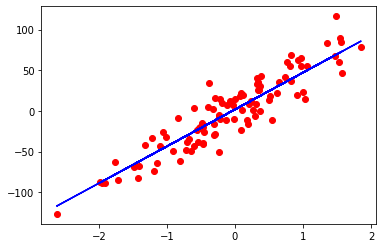

In [233]:
# step-0 prepare data
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
 
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

y = y.view(y.shape[0], 1) # convert y to row=n_samples and col=1

n_samples, n_features = X.shape

# step-1 model
model = nn.Linear(in_features=n_features, out_features=1)

# step-2 loss & optimizer
learning_rate = 0.02
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# step-3 training loop
n_iters = 100
for epoch in range(n_iters):
  # forward pass
  y_pred = model(X)

  # loss
  J = loss(y_pred, y)

  # back prop
  J.backward()

  # update weights
  optimizer.step()
  # clear grad
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch-{epoch+1}, loss = {J.item():.4f}')
    for name, param in model.named_parameters():
      print(name, '-', param)
    print()

# prediction
y_pred = model(X).detach()

# plot
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_pred.numpy(), 'b')
plt.show()

# Tutorial 08 Logistic Regression

In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [235]:
# torch.manual_seed(42)

In [236]:
# step-0 prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# convert single row with multiple columns to multiple rows single colums
y_train = y_train.view(y_train.shape[0], 1)

# step-1 model setup

# logistic regression, f = w*x+b and apply sigmoid at the end
class MyLogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(MyLogisticRegression, self).__init__()
    self.linear = nn.Linear(in_features=n_input_features, out_features=1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = MyLogisticRegression(n_features)

# initialize model parameters manually
for param in model.parameters():
    param.data.fill_(0)

# step-2 loss & optimizer
learning_rate = 0.01
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# step-3 training loop
n_iters = 100
for epoch in range(n_iters):
  # forward pass
  y_pred = model(X_train)

  # loss 
  J = loss(y_pred, y_train)

  # backward pass
  J.backward()

  # weight updates
  optimizer.step()
  # clear grads
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch {epoch+1}: loss = {J.item():.4f}')
    # for name, param in model.named_parameters():
    #   print(name, '-', param)

with torch.no_grad():
  y_pred = model(X_test)
  cls_pred = y_pred.round() # if y_pred>=0.5 class = 1, else class = 0
  test_acc = cls_pred.eq(y_test).sum() / float(y_test.shape[0])
  print(f'\ntest accuracy = {test_acc:.3f}')

epoch 10: loss = 0.5564
epoch 20: loss = 0.4664
epoch 30: loss = 0.4086
epoch 40: loss = 0.3680
epoch 50: loss = 0.3378
epoch 60: loss = 0.3143
epoch 70: loss = 0.2954
epoch 80: loss = 0.2798
epoch 90: loss = 0.2666
epoch 100: loss = 0.2553

test accuracy = 60.193


# Tutorial 9 Dataset and DataLoader - Batch Training

In [237]:
import torchvision
from torch.utils.data import Dataset, DataLoader

In [238]:
'''
epoch = one forward and backward pass of ALL training samples
batch_size = number of training samples used in one forward/backward pass
number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of samples
e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch
'''

'\nepoch = one forward and backward pass of ALL training samples\nbatch_size = number of training samples used in one forward/backward pass\nnumber of iterations = number of passes, each pass (forward+backward) using [batch_size] number of samples\ne.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch\n'

In [239]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [240]:
class WineDataset(Dataset):

  def __init__(self):
    # data loading
    wine_ds = np.loadtxt('/content/drive/My Drive/Colab Notebooks/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(wine_ds[:, 1:]) # take all rows akip first column
    self.y = torch.from_numpy(wine_ds[:, [0]]) # take all rows first column
    self.n_samples = wine_ds.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples
    

In [241]:
wine_ds = WineDataset()
wine_ds[0]

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]), tensor([1.]))

In [242]:
dataloader = DataLoader(dataset=wine_ds, batch_size=4, shuffle=True, num_workers=2)
data_iter = iter(dataloader)

data = data_iter.next()
features, labels = data
print(features, labels)

tensor([[1.2670e+01, 9.8000e-01, 2.2400e+00, 1.8000e+01, 9.9000e+01, 2.2000e+00,
         1.9400e+00, 3.0000e-01, 1.4600e+00, 2.6200e+00, 1.2300e+00, 3.1600e+00,
         4.5000e+02],
        [1.3160e+01, 2.3600e+00, 2.6700e+00, 1.8600e+01, 1.0100e+02, 2.8000e+00,
         3.2400e+00, 3.0000e-01, 2.8100e+00, 5.6800e+00, 1.0300e+00, 3.1700e+00,
         1.1850e+03],
        [1.2080e+01, 1.3900e+00, 2.5000e+00, 2.2500e+01, 8.4000e+01, 2.5600e+00,
         2.2900e+00, 4.3000e-01, 1.0400e+00, 2.9000e+00, 9.3000e-01, 3.1900e+00,
         3.8500e+02],
        [1.2990e+01, 1.6700e+00, 2.6000e+00, 3.0000e+01, 1.3900e+02, 3.3000e+00,
         2.8900e+00, 2.1000e-01, 1.9600e+00, 3.3500e+00, 1.3100e+00, 3.5000e+00,
         9.8500e+02]]) tensor([[2.],
        [1.],
        [2.],
        [2.]])


In [243]:
# iterate over dataset by batched (dummy train loop)
num_epochs = 2
total_sample = len(wine_ds)
num_iterations = math.ceil(total_sample/4)
print('total samples =', total_sample, '\n# of iterations(per epoch) =', num_iterations, '\n')

for epoch in range(num_epochs):
  for step, (inputs, labels) in enumerate(dataloader):
    if (step+1)%5==0:
      print(f'epoch {epoch+1}/{num_epochs}, step {step+1}/{num_iterations}, input_dim - {inputs.shape}')

total samples = 178 
# of iterations(per epoch) = 45 

epoch 1/2, step 5/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 10/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 15/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 20/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 25/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 30/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 35/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 40/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 45/45, input_dim - torch.Size([2, 13])
epoch 2/2, step 5/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 10/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 15/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 20/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 25/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 30/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 35/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 40/45, input_dim - torch.Size([4, 13])
epoch 2/2, s

# Tutorial 10 Dataset Transforms

In [244]:
'''
Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet

complete list of built-in transforms: 
https://pytorch.org/docs/stable/torchvision/transforms.html

On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

On Tensors
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

Generic
-------
Use Lambda 

Custom
------
Write own class

Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])
'''

'\nTransforms can be applied to PIL images, tensors, ndarrays, or custom data\nduring creation of the DataSet\n\ncomplete list of built-in transforms: \nhttps://pytorch.org/docs/stable/torchvision/transforms.html\n\nOn Images\n---------\nCenterCrop, Grayscale, Pad, RandomAffine\nRandomCrop, RandomHorizontalFlip, RandomRotation\nResize, Scale\n\nOn Tensors\n----------\nLinearTransformation, Normalize, RandomErasing\n\nConversion\n----------\nToPILImage: from tensor or ndrarray\nToTensor : from numpy.ndarray or PILImage\n\nGeneric\n-------\nUse Lambda \n\nCustom\n------\nWrite own class\n\nCompose multiple Transforms\n---------------------------\ncomposed = transforms.Compose([Rescale(256),\n                               RandomCrop(224)])\n'

In [245]:
# dataset class with transform

class WineDataset(Dataset):

  def __init__(self, transform=None):
    # data loading
    wine_ds = np.loadtxt('/content/drive/My Drive/Colab Notebooks/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
    self.x = wine_ds[:, 1:] # take all rows akip first column
    self.y = wine_ds[:, [0]] # take all rows first column
    self.n_samples = wine_ds.shape[0]
    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    return self.n_samples


In [246]:
# custom transform classes (transform using callable objects)

class MyToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MyMulTransform:
  def __init__(self, factor):
    self.factor = factor
  
  def __call__(self, sample):
    inputs, target = sample
    inputs*=self.factor
    return inputs, target

In [247]:
dataset = WineDataset()
features, labels = dataset[0]
print('without transform:', type(features), type(labels))
print('without transform: features =', features)

dataset = WineDataset(transform=MyToTensor())
features, labels = dataset[0]
print('\nwith MyToTensor() transform:', type(features), type(labels))

dataset = WineDataset(transform=MyMulTransform(2))
features, labels = dataset[0]
print('\nwith MyMulTransform(2) transform: features =', features)

without transform: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
without transform: features = [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]

with MyToTensor() transform: <class 'torch.Tensor'> <class 'torch.Tensor'>

with MyMulTransform(2) transform: features = [2.846e+01 3.420e+00 4.860e+00 3.120e+01 2.540e+02 5.600e+00 6.120e+00
 5.600e-01 4.580e+00 1.128e+01 2.080e+00 7.840e+00 2.130e+03]


# Tutorial 11 Softmax and Cross Entropy

In [248]:
# softmax using numpy

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
sm_x = softmax(x)
print(sm_x)

[0.65900114 0.24243297 0.09856589]


In [249]:
# softmax using pytorch

x = torch.tensor([2.0, 1.0, 0.1])
sm_x = torch.softmax(x, dim=0)
print(sm_x)

tensor([0.6590, 0.2424, 0.0986])


In [250]:
# cross entropy using numpy

def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss # / float(predicted.shape[0])

y_actual = np.array([1, 0, 0]) # one hot encoded

y_good_pred = np.array([0.7, 0.2, 0.1])
y_bad_pred = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(y_actual, y_good_pred)
l2 = cross_entropy(y_actual, y_bad_pred)
print(f'loss for good prediction={l1:.3f}')
print(f'loss for bad prediction={l2:.3f}')

loss for good prediction=0.357
loss for bad prediction=2.303


In [251]:
# cross entropy using pytorch (with multiple samples)

'''
nn.CrossEntropyLoss() automatically applies, 
  nn.LogSoftmax + nn.NLLLoss(neg log likelihood loss)

- Don't apply softmax in the last layer yourself
- y_actual has class labels, not One Hot Encoded!
- y_pred has raw scores and not prob values after softmax
'''

loss = nn.CrossEntropyLoss()

y_actual = torch.tensor([2, 0, 1]) # 3 samples

# 3 sample each sample can be one of 3 classes
y_pred_good = torch.tensor([ [0.2, 1.0, 2.0],[2.0, 1.0, 0.1],[1.0, 2.0, 0.1] ])
y_pred_bad = torch.tensor([ [0.5, 2.0, 0.3],[0.5, 1.0, 2.3],[7.5, 2.0, 1.3] ]) 

l1 = loss(y_pred_good, y_actual)
l2 = loss(y_pred_bad, y_actual)
print('good pred loss =', l1.item())
print('bad pred loss =', l2.item())

_, class_pred_good = torch.max(y_pred_good, 1)
_, class_pred_bad = torch.max(y_pred_bad, 1)
print('\ngood class prediction =', class_pred_good)
print('bad class prediction =', class_pred_bad)

good pred loss = 0.4204676151275635
bad pred loss = 3.236616373062134

good class prediction = tensor([2, 0, 1])
bad class prediction = tensor([1, 2, 0])


### Implementing Basic Neural Networks

In [252]:
# custom multi-class neural network with one hidden layer and relu activation
class MultiClassNeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MultiClassNeuralNet, self).__init__()
    self.linear1 = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(in_features=hidden_size, out_features=num_classes)

  def forward(self, input):
    # input layer to hidden layer
    output = self.relu(self.linear(input))
    # hidden layer to output layer
    output = self.linear2(output)
    
    # don't do softmax because nn.CrossEntropy does it for us

    return output

model = MultiClassNeuralNet(input_size=28*28, hidden_size=5, num_classes=3)
loss = nn.CrossEntropyLoss() # applies softmax to the output automatically

In [253]:
# custom binary neural network with one hidden layer and relu activation
class BinaryClassNeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(BinaryClassNeuralNet, self).__init__()
    self.linear1 = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(in_features=hidden_size, out_features=1)

  def forward(self, input):
    # input layer to hidden layer
    output = self.relu(self.linear1(input))
    # hidden layer to output layer
    output = self.linear2(output)
    # probability prediction
    y_pred = torch.sigmoid(output)
    return y_pred

model = BinaryClassNeuralNet(input_size=28*28, hidden_size=5)
loss = nn.BCELoss()